<a href="https://colab.research.google.com/github/yankikalfa/MGTF-405-Business-Forecasting/blob/main/Lecture_6_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Volatility Modeling with ARCH and GARCH

## Import Libraries and Data

In [1]:
! pip install arch
! pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 903 kB 23.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from arch import arch_model
from arch.univariate import ARCH, GARCH
import statsmodels.api as sm
import yfinance as yf

from google.colab import drive
drive.mount('/content/drive')

sns.set_style("darkgrid")
plt.rc("figure", figsize=(16, 6))
plt.rc("savefig", dpi=90)
plt.rc("font", family="sans-serif")
plt.rc("font", size=14)
# plt.style.use('fivethirtyeight')
plt.style.use('Solarize_Light2')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [24]:
df_sp = yf.download("SPY", start="2000-01-01", end="2022-10-28")

[*********************100%***********************]  1 of 1 completed


In [25]:
df_sp

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,148.250000,148.250000,143.875000,145.437500,95.746460,8164300
2000-01-04,143.531250,144.062500,139.640625,139.750000,92.002228,8089800
2000-01-05,139.937500,141.531250,137.250000,140.000000,92.166779,12177900
2000-01-06,139.625000,141.500000,137.750000,137.750000,90.685532,6227200
2000-01-07,140.312500,145.750000,140.062500,145.750000,95.952148,8066500
...,...,...,...,...,...,...
2022-10-21,365.119995,374.799988,363.540009,374.290009,374.290009,130897700
2022-10-24,375.890015,380.059998,373.109985,378.869995,378.869995,85436900
2022-10-25,378.790009,385.250000,378.670013,384.920013,384.920013,78846300


In [26]:
df_sp= df_sp[['Close']]
df_sp = np.log(df_sp).diff().dropna()
df_sp = df_sp*100
df_sp

,Close
Date,
2000-01-04,-3.989133
2000-01-05,0.178731
2000-01-06,-1.620197
2000-01-07,5.645238
2000-01-10,0.342466
...,...
2022-10-21,2.401090
2022-10-24,1.216220
2022-10-25,1.584243


In [27]:
df_sse=yf.download("000001.SS", start="2000-01-01", end="2022-10-28")

[*********************100%***********************]  1 of 1 completed


In [28]:
df_sse=df_sse[['Close']]
df_sse = np.log(df_sse).diff().dropna()
df_sse = df_sse*100
df_sse

,Close
Date,
2000-01-05,0.235154
2000-01-06,3.776866
2000-01-07,3.534082
2000-01-10,1.862281
2000-01-11,-4.320233
...,...
2022-10-21,0.127754
2022-10-24,-2.040126
2022-10-25,-0.042998


## Time Series Plots

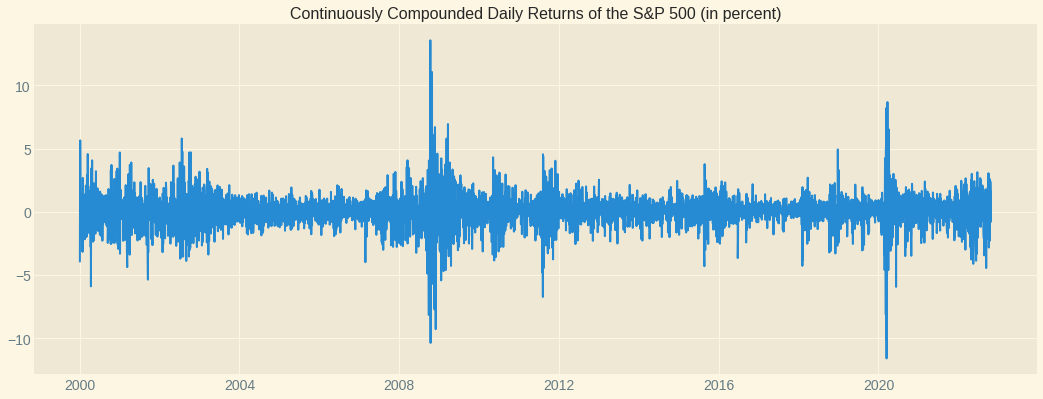

In [36]:
plt.plot(df_sp)
plt.title('Continuously Compounded Daily Returns of the S&P 500 (in percent)')
plt.show()

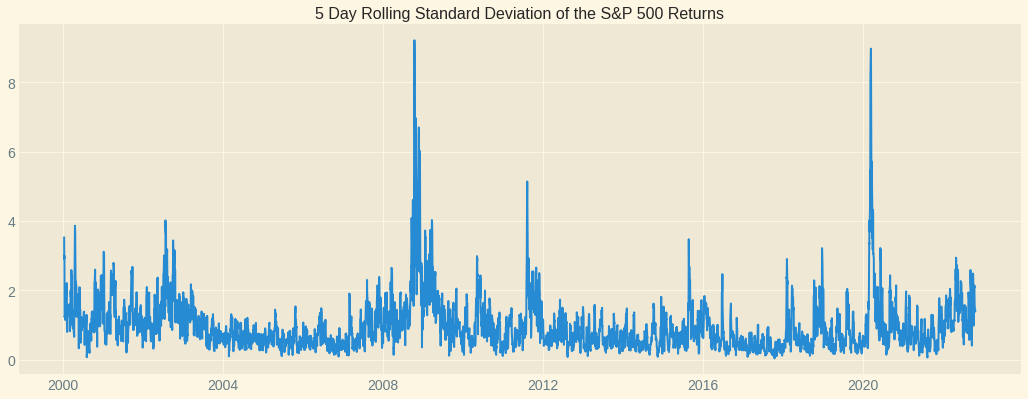

In [37]:
plt.plot(df_sp.rolling(5).std())
plt.title('5 Day Rolling Standard Deviation of the S&P 500 Returns')
plt.show()

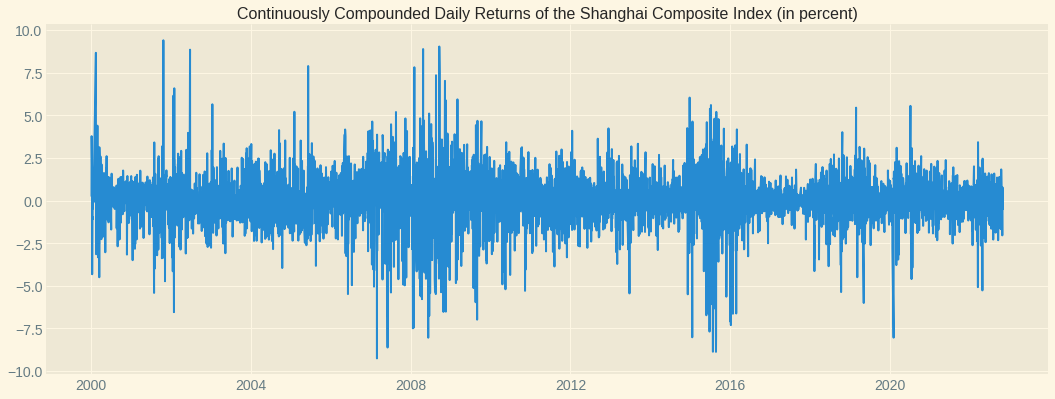

In [38]:
plt.plot(df_sse)
plt.title('Continuously Compounded Daily Returns of the Shanghai Composite Index (in percent)')
plt.show()

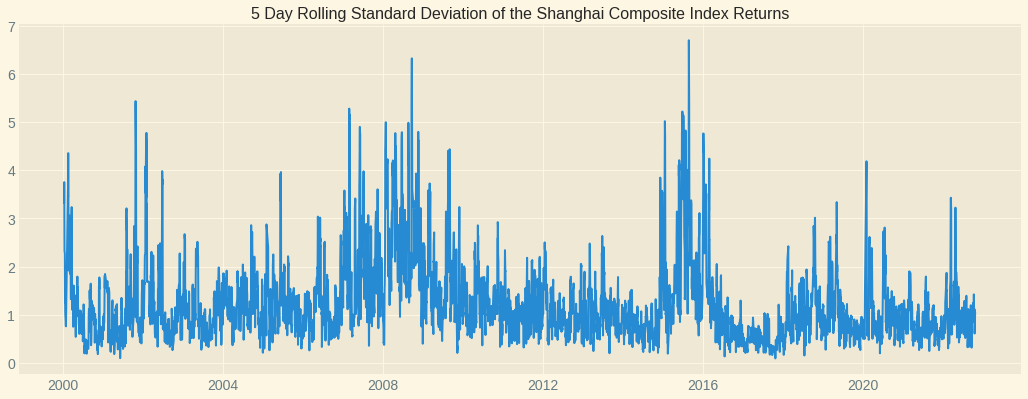

In [35]:
plt.plot(df_sse.rolling(5).std())
plt.title('5 Day Rolling Standard Deviation of the Shanghai Composite Index Returns')
plt.show()

## ARCH(1)

## General representation of ARCH type models

$$r_t=\mu + \epsilon_t $$
$$ \epsilon_t =\sigma_te_t $$
$$\sigma_t^2 = \omega + \sum_{p=1}^P \alpha_{p} \epsilon_{t-p}^2$$

We assume constant mean with no AR parameters.

In [53]:
dist='normal'
#dist='t'
am_sp = arch_model(df_sp,p=1,q=0,o=0, dist=dist)
res_sp=am_sp.fit(update_freq=10,disp='off')

am_sse = arch_model(df_sse,p=1,q=0,o=0, dist=dist)
res_sse=am_sse.fit(update_freq=10,disp='off')

print("ARCH-1 Model for SP500 Returns");
print(res_sp.summary());
print("ARCH-1 Model for SSE Returns");
print(res_sse.summary())

ARCH-1 Model for SP500 Returns
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -8932.98
Distribution:                  Normal   AIC:                           17872.0
Method:            Maximum Likelihood   BIC:                           17891.9
                                        No. Observations:                 5742
Date:                Sat, Oct 29 2022   Df Residuals:                     5741
Time:                        16:49:15   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0499  1.58

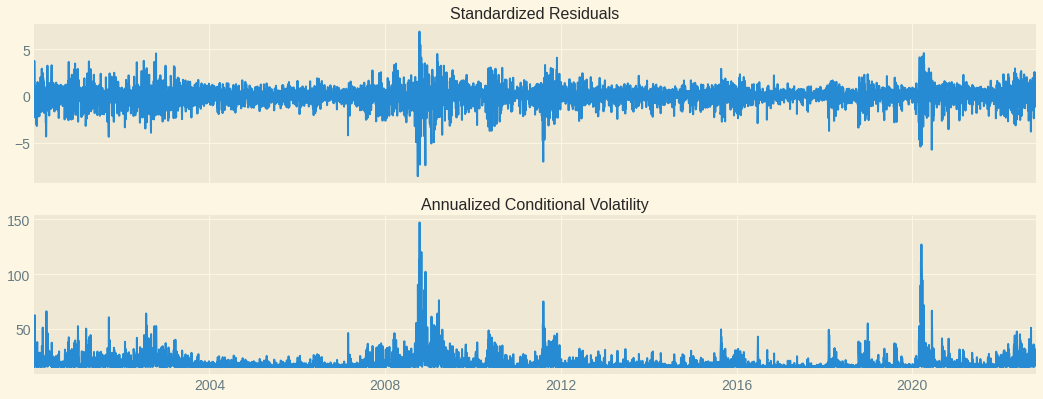

In [54]:
res_sp.plot(annualize="D")
plt.show()

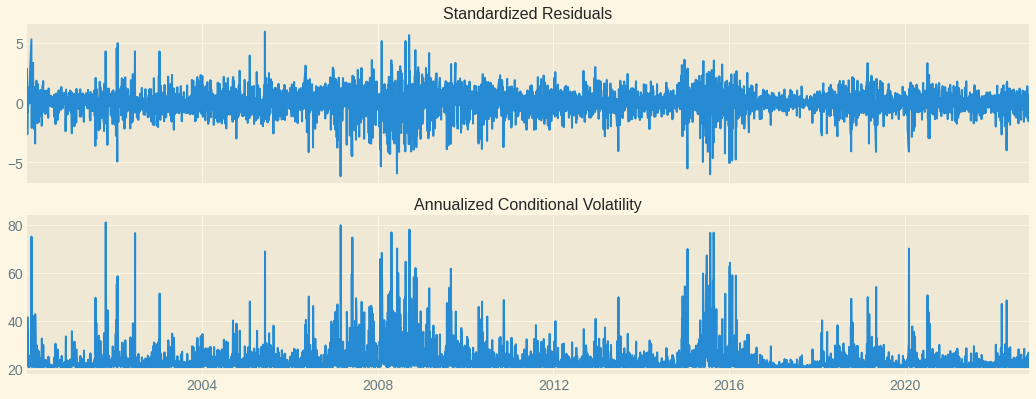

In [51]:
res_sse.plot(annualize='D')
plt.show()

## GARCH(1,1)

## General representation of GARCH type models

$$r_t=\mu + \epsilon_t $$
$$ \epsilon_t =\sigma_te_t $$
$$\sigma_t^2 = \omega + \sum_{p=1}^P \alpha_{p} \epsilon_{t-p}^2 + \sum_{q=1}^Q \beta_q \sigma^{2}_{t-q}$$

We assume constant mean with no AR parameters.

In [55]:
dist='normal'
#dist='t'
gm_sp = arch_model(df_sp,p=1,q=1,o=0, dist=dist)
res_sp=gm_sp.fit(update_freq=10,disp='off')

gm_sse = arch_model(df_sse,p=1,q=1,o=0, dist=dist)
res_sse=gm_sse.fit(update_freq=10,disp='off')

print("GARCH-(1,1) Model for SP500 Returns");
print(res_sp.summary());
print("GARCH-(1,1) Model for SSE Returns");
print(res_sse.summary())

GARCH-(1,1) Model for SP500 Returns
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -7982.88
Distribution:                  Normal   AIC:                           15973.8
Method:            Maximum Likelihood   BIC:                           16000.4
                                        No. Observations:                 5742
Date:                Sat, Oct 29 2022   Df Residuals:                     5741
Time:                        16:55:49   Df Model:                            1
                                 Mean Model                                 
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0595 

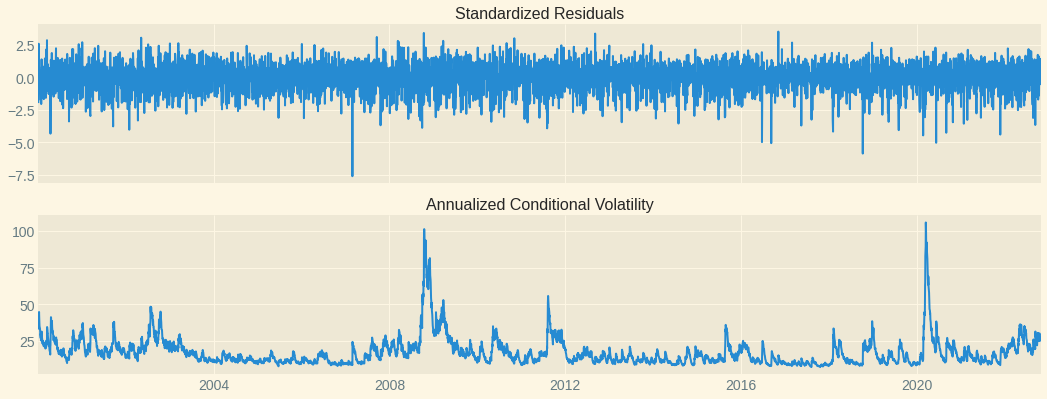

In [63]:
res_sp.plot(annualize="D")
plt.show()

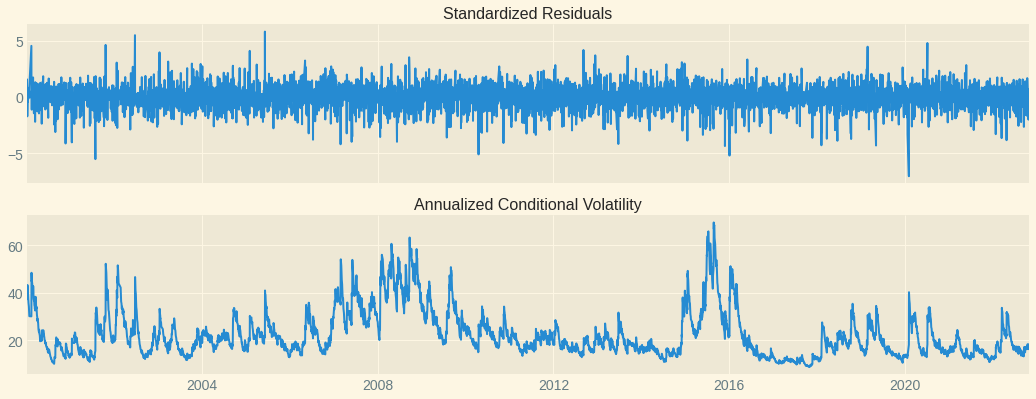

In [65]:
res_sse.plot(annualize="D")
plt.show()

## GJR-GARCH(1,1,1)

## General representation of Leveraged GARCH type models

$$r_t=\mu + \epsilon_t $$
$$ \epsilon_t =\sigma_te_t $$
$$\sigma_t^2 = \omega + \sum_{p=1}^P \alpha_{p} \epsilon_{t-p}^2 + \sum_{o=1}^{O} \gamma_{o}\epsilon_{t-o}^{2} I_{|\epsilon_{t-o}<0|}+ \sum_{q=1}^Q \beta_q \sigma^{2}_{t-q}$$

We assume constant mean with no AR parameters.

In [71]:
dist='normal'
#dist='t'
lm_us = arch_model(df_sp,p=1,q=1,o=1, dist=dist)
res_sp = lm_us.fit(update_freq=10)

lm_sse = arch_model(df_sse,p=1,q=1,o=1, dist=dist)
res_sse = lm_sse.fit(update_freq=10)

print("GJR-GARCH(1,1,1) Model for SP500 Returns");
print(res_sp.summary());
print("GJR-GARCH(1,1,1) Model for SSE Returns");
print(res_sse.summary())

Iteration:     10,   Func. Count:     77,   Neg. LLF: 7882.903809430986
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7882.9037412567195
            Iterations: 13
            Function evaluations: 94
            Gradient evaluations: 13
Iteration:     10,   Func. Count:     77,   Neg. LLF: 9313.962426009886
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9311.32060971524
            Iterations: 13
            Function evaluations: 96
            Gradient evaluations: 13
GJR-GARCH(1,1,1) Model for SP500 Returns
                   Constant Mean - GJR-GARCH Model Results                    
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                  GJR-GARCH   Log-Likelihood:               -7882.90
Distribution:                  Normal   AIC:                           15775.8
Me

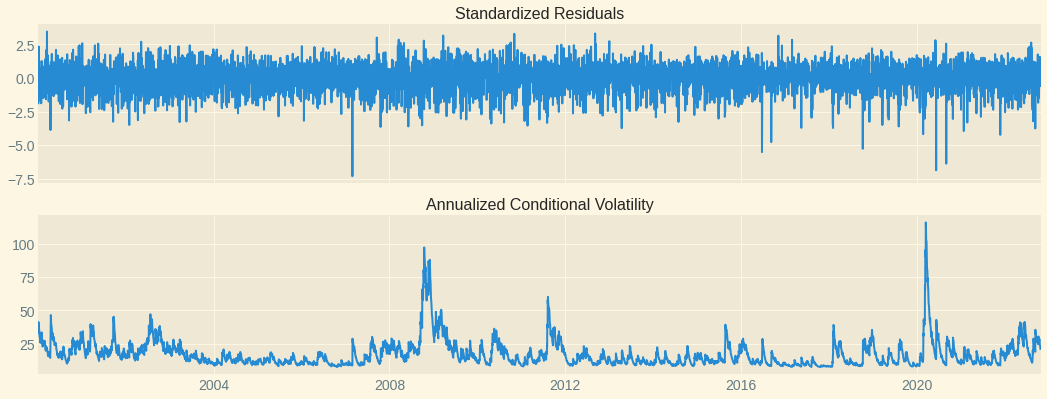

In [72]:
res_sp.plot(annualize="D")
plt.show()

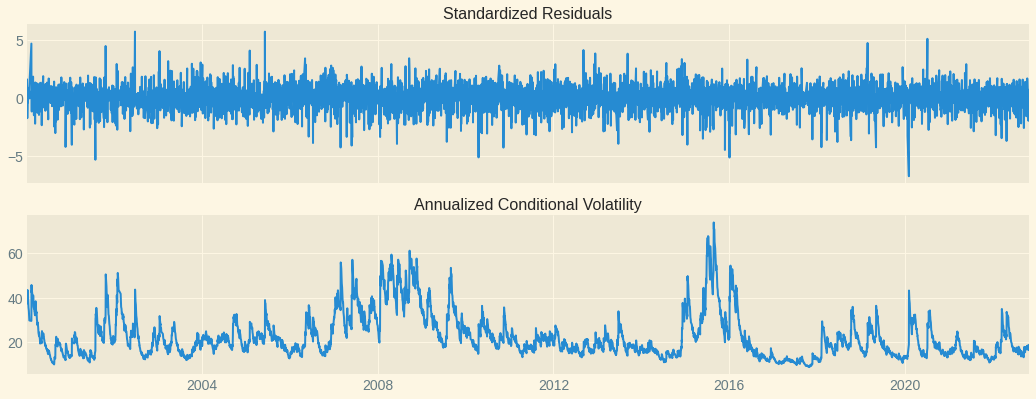

In [73]:
res_sse.plot(annualize="D")
plt.show()

## EGARCH (1,1,1)

## General representation of EGARCH type models

$$r_t=\mu + \epsilon_t $$
$$ \epsilon_t =\sigma_te_t $$
$$ln(\sigma_t^2) = \omega + \sum_{p=1}^P \{\alpha_{p} (|\epsilon_{t-p}|-\mathbb{E}[|\epsilon_{t-p}|])\}+ \sum_{o=1}^O\gamma_{o}\epsilon_{t-o}+ \sum_{q=1}^Q \beta_q ln(\sigma^{2}_{t-q})$$

We assume constant mean with no AR parameters.

In [85]:
dist='normal'
#dist='t'
# dist='skewt'
em_us = arch_model(df_sp,p=1,q=1,o=1,vol='EGARCH', dist=dist)
res_sp = em_us.fit(update_freq=10)

em_sse = arch_model(df_sse,p=1,q=1,o=1,vol="EGARCH", dist=dist)
res_sse = em_sse.fit(update_freq=10)

print("EGARCH(1,1,1) Model for SP500 Returns");
print(res_sp.summary());
print("EGARCH(1,1,1) Model for SSE Returns");
print(res_sse.summary());
print('We see that the model coefficients exceed 1')

Iteration:     10,   Func. Count:     80,   Neg. LLF: 7865.078445596529
Optimization terminated successfully    (Exit mode 0)
            Current function value: 7865.078431448025
            Iterations: 12
            Function evaluations: 91
            Gradient evaluations: 12
Iteration:     10,   Func. Count:     85,   Neg. LLF: 9294.721258430302
Optimization terminated successfully    (Exit mode 0)
            Current function value: 9294.72125721031
            Iterations: 12
            Function evaluations: 96
            Gradient evaluations: 12
EGARCH(1,1,1) Model for SP500 Returns
                     Constant Mean - EGARCH Model Results                     
Dep. Variable:                  Close   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                     EGARCH   Log-Likelihood:               -7865.08
Distribution:                  Normal   AIC:                           15740.2
Method

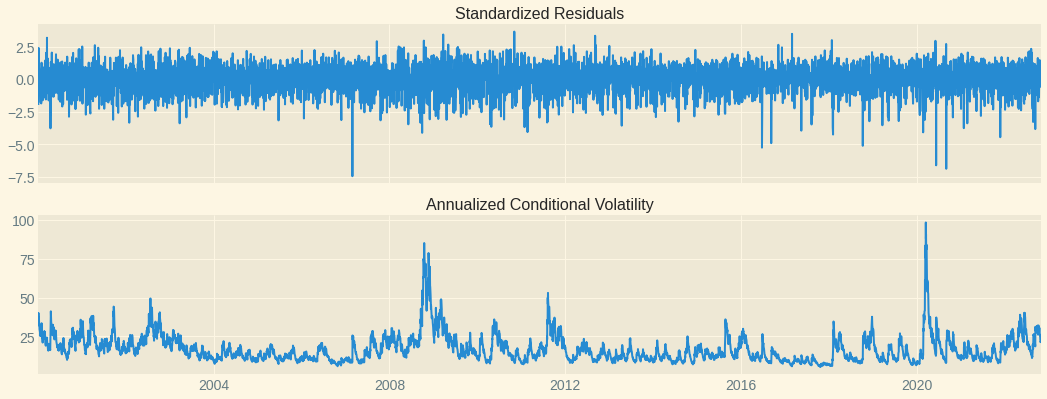

In [86]:
res_sp.plot(annualize="D")
plt.show()

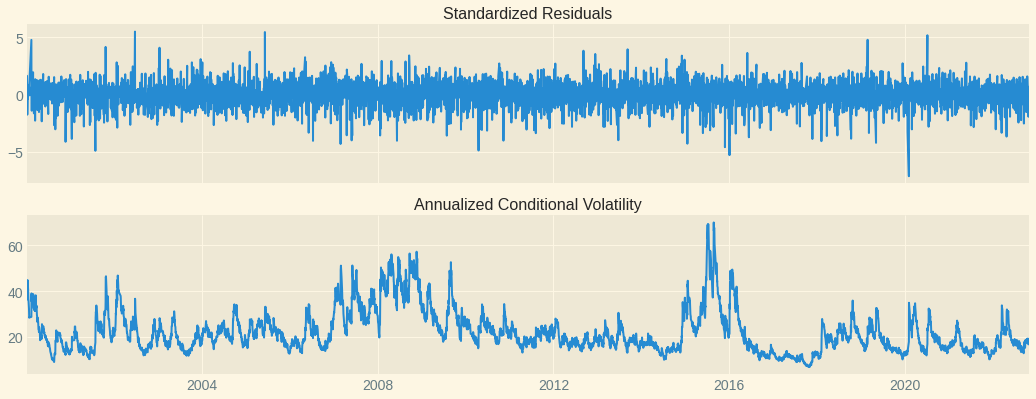

In [87]:
res_sse.plot(annualize="D")
plt.show()

## Volatility Forecasting

### S&P 500 Returns

.....................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................
                  h.1
2018-12-28  

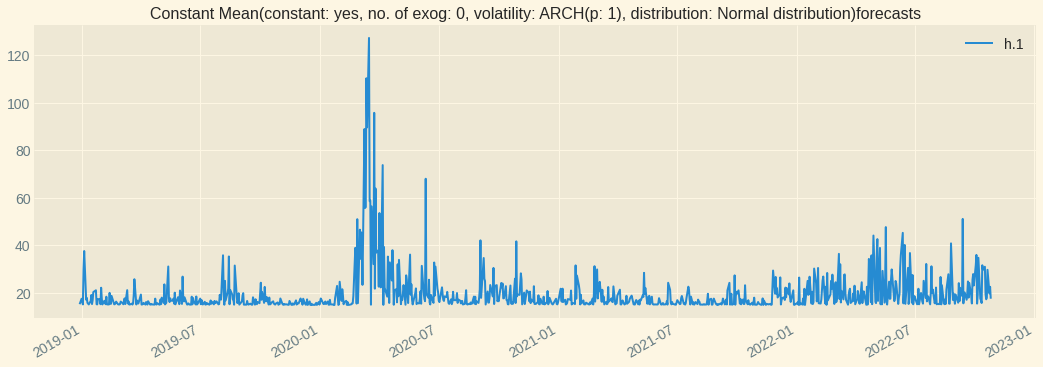

In [89]:
import sys
index = df_sp.index
start_loc = 0
end_loc = np.where(index >= "2018-12-31")[0].min()

### Select the forecasting model ###
am = am_sp
# am = gm_sp
# am = lm_sp
# am = em_sp

### Select Forecasting Horizon ###
h=1

### Foerecasting Loop ###

forecasts = {}
for i in range(965):
    sys.stdout.write(".")
    sys.stdout.flush()
    res = am.fit(last_obs=i + end_loc, disp="off")
    temp = np.sqrt(res.forecast(horizon=h, reindex=False).variance)*np.sqrt(252)
    fcast = temp.iloc[0]
    forecasts[fcast.name] = fcast
print()
print(pd.DataFrame(forecasts).T)
pd.DataFrame(forecasts).T.plot(title= f'{am}' 'forecasts')